# Perguntas

Case: O ano é 2020. Sou analista de dados de uma ONG que defende os direitos ao acesso a saúde pública no mundo. A ONG pretende distribuir um medicamento que auxiliará o tratamento de depressão. 
A equipe me solicita a informação e uma análise dos 10 países em que será mais recomendado lançar o produto primeiro.
Para isso, temos os seguintes critérios:
 - Países com um número maior de prevalência dos casos de transtornos depressivos, baixa felicidade e altas taxas de suicidio 
 - Considerando a contra indicação de uso do medicamento em conjunto com alcool e outras susbtâncias, deve-se sugerir países cujo a prevalência de transtornos relacionados seja relativamente baixa nos últimos 10 anos;
 - Nesses países, qual o gênero do público deve ser o foco da equipe de divulgação, considerando aspectos de mortalidade e frequência de ocorrência de casos de transtornos depressivos.

Para atender a demanda, será feito os seguintes questionamentos:

1. Quais os países que numa análise geral são críticos em felicidade?
2. O suicídio está realmente atrelado as taxas de depressão? (teste de hipótese)
3. Desses países, quais possuem menores taxas de transtornos associados ao uso de alcool e drogas nos últimos 10 anos?
4. Qual a relação do genêro com a mortalidade por suicidio e as taxas de transtornos depressivos?

# Datasets:

***df_countries:*** *CountriesRef:* Dataset com as informações de continente dos países.\
***df_happiness:*** *WorldHappiness2019:* Dataset de felicidade global que avalia critérios como renda, expectativa de vida, oportunidades, afetos e situações específicas como questões sociais, políticas e manuntenção de direitos em diversos países do mundo. Utilizado o dataset referente ao ano de 2019\
Fonte: [Kaggle](https://www.kaggle.com/datasets/joebeachcapital/world-happiness-report-2013-2023?select=World+Happiness+Report+2019.csv)
<br>
***df_depression:*** *PrevalenceOfDepressionByGender:* Dataset com as informações de prevalência de casos depressivos por genêro nos países do mundo. Para a análise será considerado dados de 2019.\
Fonte: [Kaggle](https://www.kaggle.com/datasets/kamaumunyori/global-health-data-analysis-1990-2019/data)
<br>
***df_suicide:*** *SuicideRateByCountries:* Taxas de suicidio no ano de 2019 por países do mundo e por genêro.\
Fonte: [Kaggle](https://www.kaggle.com/datasets/kamaumunyori/global-health-data-analysis-1990-2019/data)
<br>
***AlcoholAndDrugUseDisorders:*** Taxas de transtornos relacionadas ao uso de alcool e drogas de 1990 a 2019.\
Fonte: [Kaggle](https://www.kaggle.com/datasets/programmerrdai/drugs-use?select=share-with-alcohol-vs-drug-use-disorder.csv)

In [504]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


# DataFrame1


In [506]:
df_countries = pd.read_csv('./datasets/CountriesRef.csv', usecols=['Continent', 'Country'])
print(df_countries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  203 non-null    object
 1   Country    204 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB
None


# DataFrame2

In [509]:
df_happiness = pd.read_csv('./datasets/WorldHappiness2019.csv', usecols=['Country or region', 'Score']) #leitura do arquivo.csv

# print(df_happiness.columns)
#armazenamento do nome das colunas: 'Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'

df_happiness['Year'] = 2019 #criação de coluna para referenciar o ano do dataset
df_happiness.rename(columns={'Country or region': 'Country', 'Score': 'Score_Happiness'}, inplace=True) #renomear colunas para facilitar identificação dos dados

def happiness(valor):
    if valor >= 5.407096:
        return 'happy country'
    else:
        return 'unhappy country'

df_happiness['Result_Happiness'] = df_happiness['Score_Happiness'].apply(happiness)

# limpeza e tratamento
# print('Nulos: \n', df_happiness.isnull().sum()) #verificação dos nulos
df_happiness = df_happiness.dropna(how='all') #limpeza de possíveis linhas vazias
# print('Duplicados: ',; df_happiness.duplicated().sum()) #verificação dos duplicados

#visualizações e checagens do dataframe
# print(df_happiness.describe()) # 5.407096 MÉDIA GLOBAL DE FELICIDADE
print(df_happiness.info())
# print(df_happiness.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           156 non-null    object 
 1   Score_Happiness   156 non-null    float64
 2   Year              156 non-null    int64  
 3   Result_Happiness  156 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0+ KB
None


# Dataframe3

In [510]:
df_depression = pd.read_csv("./datasets/PrevalenceOfDepressionByGender.csv", index_col='index') #leitura do arquivo.csv 

# print(df_depression.columns)

# armazenamento do nome das colunas: Entity', 'Code', 'Year', 'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)', 'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)', 'Population (historical estimates)', 'Continent'

columns_drop = ['Code', 'Continent', 'Population (historical estimates)'] 
df_depression.drop(columns=columns_drop, inplace=True) # exlusão das colunas que não serão utilizadas para análise
df_depression.rename(columns={'Entity': 'Country', 
                              'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)': 'Depression_disorders_Male', 
                              'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)': 'Depression_disorders_Female'
                              }, inplace=True) #renomear para padronizar datasets

df_depression['Depression_disorders_Both_Gender'] = (df_depression['Depression_disorders_Female'] + df_depression['Depression_disorders_Male'])/2 #criação da coluna com a média das taxas de transtornos depressivos em ambos os sexos

df_depression = df_depression[df_depression['Year'] == 2019].reset_index(drop='index') #filtragem por ano de 2019

#limpeza
# print('Nulos: \n', df_depression.isnull().sum()) #checagem de nulos
df_depression = df_depression.dropna() #remoção dos valores nulos
# print('Duplicados: ', df_depression.duplicated().sum()) #checagem dos duplicados

#checagens do dataframe
# print(df_depression.describe()) # 3.145877 MÉDIA GLOBAL DE TRANSTORNOS DEPRESSIVOS EM 2019
print(df_depression.info())
# print(df_depression.head())

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 0 to 264
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           228 non-null    object 
 1   Year                              228 non-null    int64  
 2   Depression_disorders_Male         228 non-null    float64
 3   Depression_disorders_Female       228 non-null    float64
 4   Depression_disorders_Both_Gender  228 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 10.7+ KB
None


# Dataframe4

In [512]:
df_suicide = pd.read_csv('./datasets/SuicideRateByCountry.csv') #leitura do arquivo.csv 

#info colunas
df_suicide.columns
#armazenamento do nome das colunas: 'country', 'rate2019both', 'rate2019male', 'rate2019female'

df_suicide.rename(columns={
    'country': 'Country', 
    'rate2019both': 'Rate_Suicide_Both_Gender',
    'rate2019male': 'Rate_Suicide_Male',
    'rate2019female': 'Rate_Suicide_Female'
    }, inplace=True) #renomear para padronizar datasets

df_suicide['Year'] = 2019 #criação de coluna para referenciar o ano do dataset

#limpeza
# print('Nulos: \n', df_suicide.isnull().sum()) #checagemm dos nulos
# print('Duplicados: ', df_suicide.duplicated().sum()) #checagem dos duplicados

#checagens do dataframe
# print(df_suicide.describe()) # 14.678212 MÉDIA GLOBAL DA TAXA DE SUÍCIDIO POR 100 MIL HABITANTES
print(df_suicide.info())
# print(df_suicide.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   179 non-null    object 
 1   Rate_Suicide_Both_Gender  179 non-null    float64
 2   Rate_Suicide_Male         179 non-null    float64
 3   Rate_Suicide_Female       179 non-null    float64
 4   Year                      179 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 7.1+ KB
None


# Dataframe Union - Mental Heatlh Global

In [525]:
df_mental_health = pd.merge(df_countries, df_happiness, on='Country', how='inner')
df_mental_health = pd.merge(df_mental_health, df_depression, on='Country', how='inner')
df_mental_health = pd.merge(df_mental_health, df_suicide, on='Country', how='inner')

df_mental_health.drop(columns={'Year_x', 'Year_y'}, inplace=True)

# print(df_mental_health)
print(df_mental_health.info())

df_mental_health.to_csv('Mental_Health_Global_2019.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Continent                         128 non-null    object 
 1   Country                           128 non-null    object 
 2   Score_Happiness                   128 non-null    float64
 3   Result_Happiness                  128 non-null    object 
 4   Depression_disorders_Male         128 non-null    float64
 5   Depression_disorders_Female       128 non-null    float64
 6   Depression_disorders_Both_Gender  128 non-null    float64
 7   Rate_Suicide_Both_Gender          128 non-null    float64
 8   Rate_Suicide_Male                 128 non-null    float64
 9   Rate_Suicide_Female               128 non-null    float64
 10  Year                              128 non-null    int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 11.1+ KB
None


# 1. Quais os países que numa análise geral são críticos em felicidade?

Uma análise proposta do score de felicidade geral, taxas de casos de transtornos depressivos e taxas de suicidio.

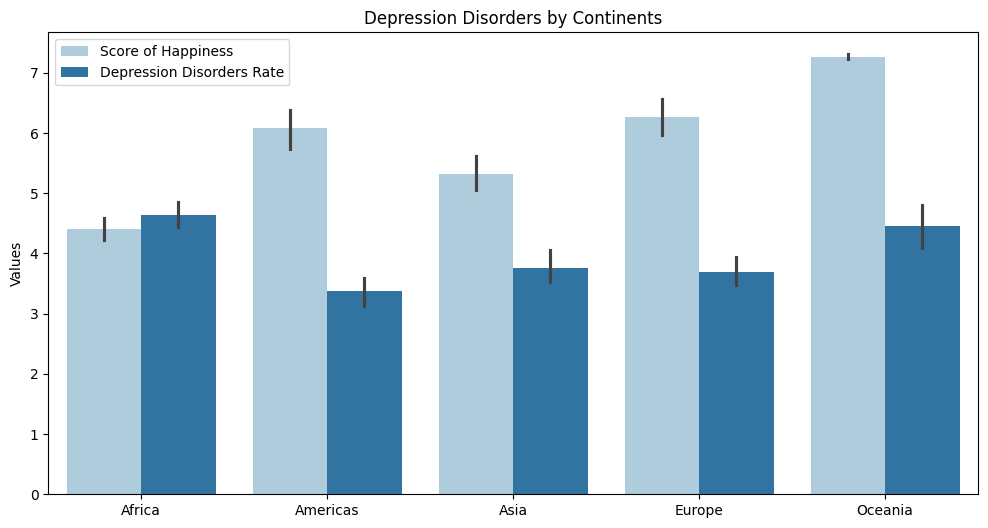

In [517]:
# FILTRAGEM
df_continent = pd.melt(df_mental_health, id_vars=['Country', 'Continent'], value_vars=['Score_Happiness', 'Depression_disorders_Both_Gender'], var_name='Type_value', value_name='Values') # transformar colunas em linhas
df_continent.replace({'Depression_disorders_Both_Gender': 'Depression Disorders Rate', 'Score_Happiness': 'Score of Happiness'}, inplace=True) #renomear legenda
# print(df_continent)

# PLOTAGEM GRÁFICA
plt.figure(figsize=(12,6))
sns.barplot(data=df_continent, x='Continent', y='Values', hue='Type_value', palette='Paired')

plt.xticks(rotation=0)
plt.xlabel('')
plt.title('Depression Disorders by Continents')
plt.legend()

plt.show()

***Insights***

Continentes considerados mais críticos em felicidade: **Asia e Africa**. O que pode ser o foco da análise e escolha dos países, uma vez que o objetivo da ONG é alcançar um público vulnerável. \
*Nota: Aspectos como renda per capita, liberdade de escolha e estabilidade governamental foram considerados para o score geral de felicidade, por isso será possível utilizar o score como dado referencial.*

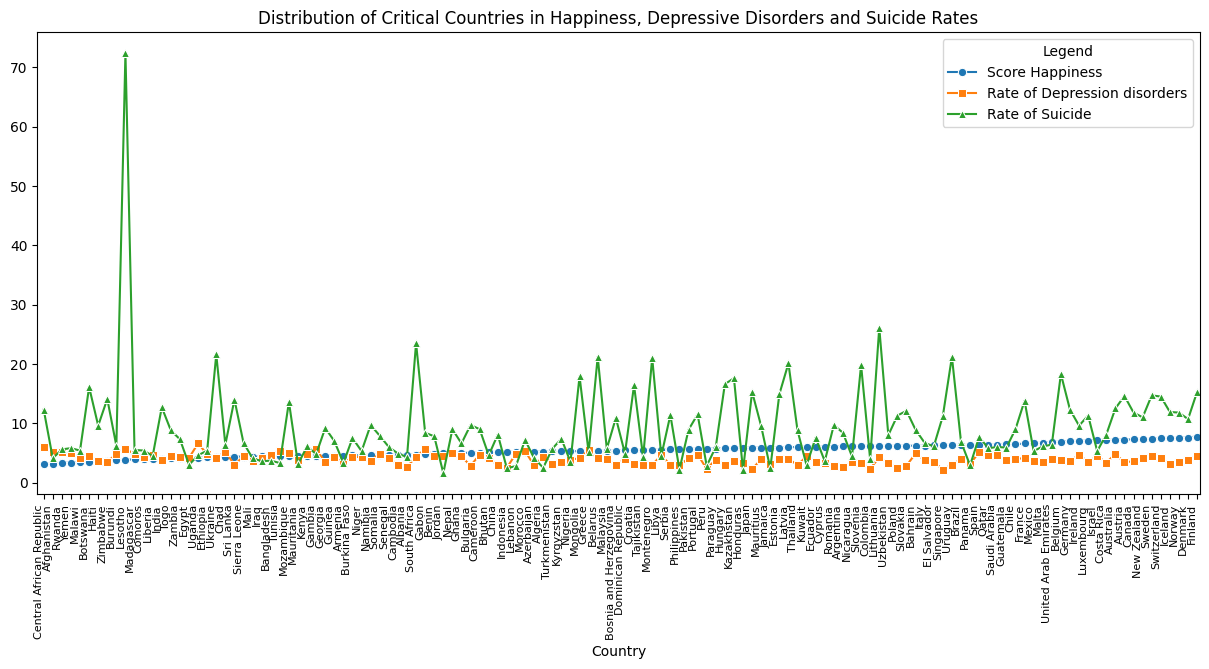

In [518]:
df_mental_health = df_mental_health.sort_values(by='Score_Happiness', ascending=True).reset_index(drop='index') #ordenação para idenficar os países mais infelizes

# PLOTAGEM GRÁFICA
plt.figure(figsize=(15, 6))
ax = sns.lineplot(data=df_mental_health, x='Country', y='Score_Happiness', label='Score Happiness', marker='o')
ax = sns.lineplot(data=df_mental_health, x='Country', y='Depression_disorders_Both_Gender', label='Rate of Depression disorders', marker='s')
ax = sns.lineplot(data=df_mental_health, x='Country', y='Rate_Suicide_Both_Gender', label='Rate of Suicide', marker='^')

plt.title('Distribution of Critical Countries in Happiness, Depressive Disorders and Suicide Rates')
plt.xlabel('Country')
plt.ylabel('')
plt.xticks(rotation=90, ha='right', fontsize=8) 
plt.xlim(-0.7, len(df_mental_health['Country']) - 0.7)

plt.legend(title='Legend')
plt.show()

***Insights***

Analisando o gráfico ordenado por países com menores taxas de felicidade geral, as elevadas taxas de suicídio mesmo em países cuja taxa de ocorrência de transtornos depressivos é menor. Confirmando a necessidade de validação se as taxas de suicídio são importantes para a análise proposta e se indicam realmente a relevância do dado para conclusão dos países que devem ser o público alvo.


# 2. O suicídio está realmente atrelado as taxas de depressão?

A relação entre as elevadas taxas de suicidio está associada à altas taxas de casos depressivos em ambos os sexos?
<br>
**H[0]**: Hipótese nula: Não há relação entre aumento das taxas de suicídio e a prevalência de transtornos depressivo\
**H[1]**: Há relação entre aumento das taxas de suicídio e a prevalência de transtornos depressivo\
Para resposta, será feita análise da correlação.

Correlação de Pearson: 0.059049121804752525
Correlação positiva fraca
P-valor: 0.5079141518050623
Aceitamos a hipótese nula


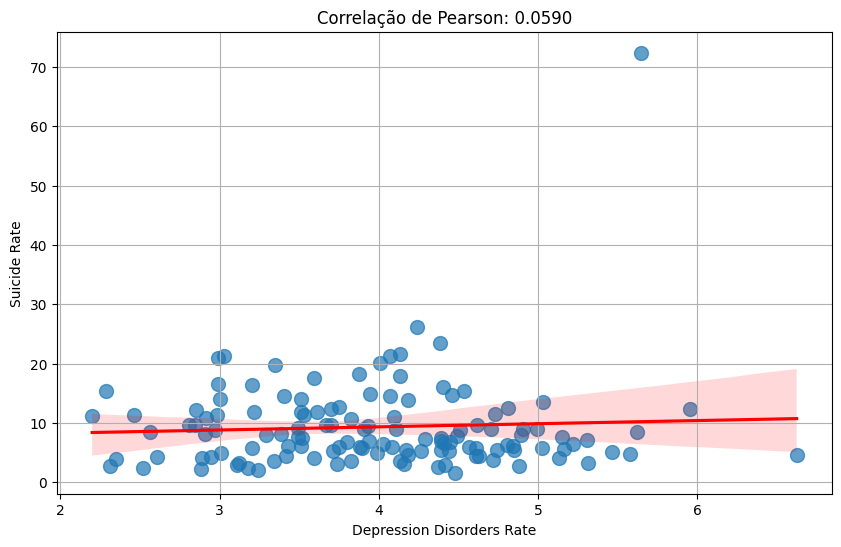

In [393]:
#Correlação de Pearson
corr, valor_p = pearsonr(df_mental_health['Depression_disorders_Both_Gender'], df_mental_health['Rate_Suicide_Both_Gender'])
print(f'Correlação de Pearson: {corr}')
if corr > 0.3:
    print('Correlação positiva forte')
elif corr < -0.3:
    print('Correlação negativa forte')
elif corr >= -0.03 and corr < 0:
    print('Correlação negativa fraca')
elif corr > 0 and corr <= 0.3:
    print('Correlação positiva fraca')
else:
    print('Sem correlação')

print(f'P-valor: {valor_p}')
if valor_p < 0.05:
    print('Rejeitamos a hipótese nula')
else:
    print('Aceitamos a hipótese nula')

# PLOTAGEM GRÁFICA
plt.figure(figsize=(10, 6))
sns.regplot(data=df_mental_health, x=df_mental_health['Depression_disorders_Both_Gender'], y=df_mental_health['Rate_Suicide_Both_Gender'], scatter_kws={'s':100, 'alpha':0.7}, line_kws={'color':'red'})

plt.title(f'Correlação de Pearson: {corr:.4f}')
plt.xlabel('Depression Disorders Rate')
plt.ylabel('Suicide Rate')
plt.grid(True)

plt.show()

***Insights***

Pelo gráfico de dispersão podemos concluir que não há uma relação significativa entre as taxas de suicídio e a taxa de casos depressivos, uma vez que apesar da taxa ser maior, a ocorrência de elevado número de suicídio não é sempre proporcionalmente maior também.\
Como conclusão, para análise proposta de países mais adeptos ao uso do medicamento antidepressivo será desconsiderado os valores de suicidio e feito análise apenas da felicidade e ocorrência de transtornos.

# Retornamos a pergunta 1. Quais os países que numa análise geral devem ser o alvo?

Uma análise proposta do score de felicidade geral e taxas de casos de transtornos depressivos.\

Considera-se países cuja taxa de transtornos depressivos seja maior que 3ª quartil (75%) dos dados

Proportion of depressed countries
 Continent
Africa     0.56250
Asia       0.25000
Europe     0.15625
Oceania    0.03125
Name: proportion, dtype: float64


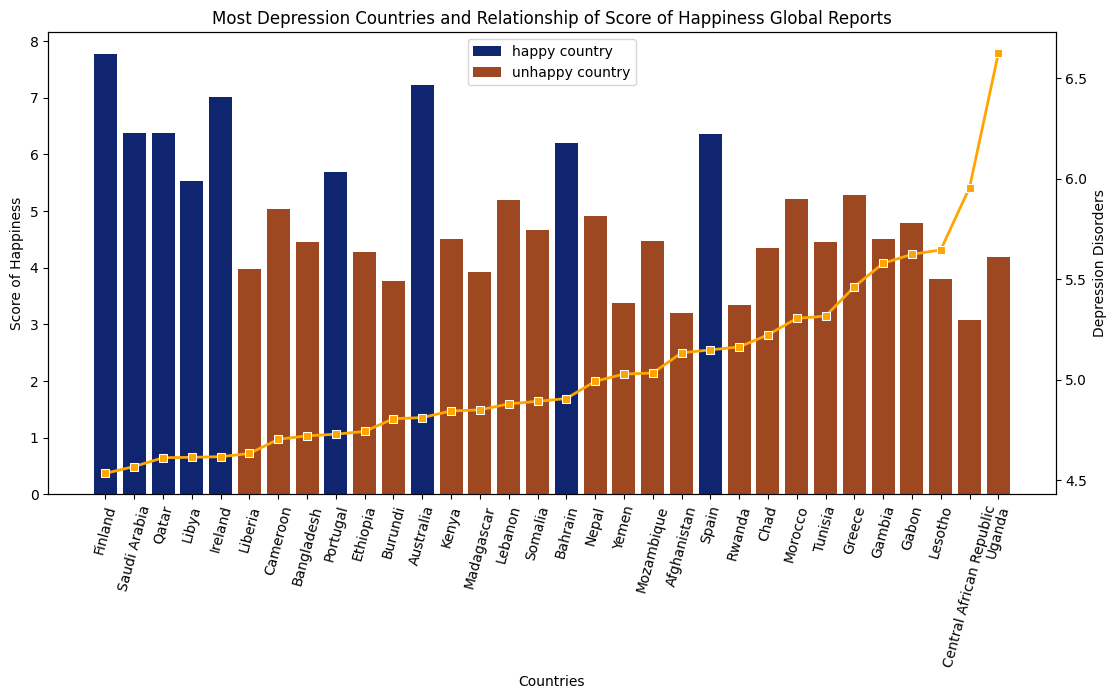

In [394]:
depressed_high = df_mental_health['Depression_disorders_Both_Gender'].quantile(0.75)
depressed_countries = df_mental_health[df_mental_health['Depression_disorders_Both_Gender'] >= depressed_high].sort_values(by='Depression_disorders_Both_Gender')

print('Proportion of depressed countries\n', depressed_countries['Continent'].value_counts(normalize=True))

# PLOTAGEM GRÁFICA
fig, ax1 = plt.subplots(figsize=(13, 6))

ax = sns.barplot(data=depressed_countries, x='Country', y='Score_Happiness', ax=ax1, palette='dark', hue='Result_Happiness')
ax2 = ax1.twinx() #possibilita a sobreposição do outro gráfico
sns.lineplot(x='Country', y='Depression_disorders_Both_Gender', data=depressed_countries, ax=ax2, color='orange', marker='s', linewidth=2)

ax1.set_xlabel('Countries', )
ax1.set_ylabel('Score of Happiness', color='black')
ax2.set_ylabel('Depression Disorders', color='black')
ax1.set_xticks(ax1.get_xticks()) #declaração sugerida pelo warning do ipynb
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)
plt.title('Most Depression Countries and Relationship of Score of Happiness Global Reports')
ax1.legend(loc='upper center')

plt.show()

***Insights***

Validou que países com maior ocorrência de transtornos depressivos possuem associação com a qualidade de vida e o índice geral de felicidade do país.
Casos excepcionais como a Finlândia devem ser refinados nos próximos critérios.


# 3. Desses países, quais possuem menores taxas de transtornos associados ao uso de alcool e drogas nos últimos dez anos?

Considerado a média dos valores de 2010 a 2019 para a ocorrência de transtornos associados ao uso de álcool e drogas.\
Como os anos de referência dos dataframes analisados mudou, criou-se um novo dataset.\
Serão analisados países cuja taxa de transtornos associados ao uso de alcool seja menor que 1ª quartil (25%) dos dados em cruzamento com os países considerados depressivos pela análise anterior

# Dataframe5

In [521]:
df_substances_use = pd.read_csv('./datasets/AlcoholAndDrugUseDisorders.csv') # leitura do arquivo.csv 

# info colunas
# print(df_substances_use.columns)
# armazenamento do nome das colunas: 'Entity', 'Code', 'Year', 'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)', 'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)', 'Population (historical estimates)', 'Continent'

columns_drop = ['Code', 'Continent', 'Population (historical estimates)']
df_substances_use.drop(columns=columns_drop, inplace=True)

df_substances_use = df_substances_use[(df_substances_use['Year'] <= 2019) & (df_substances_use['Year'] >= 2010)]

df_substances_use.rename(columns={'Entity': 'Country', 
                                  'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)': 'Alcohol_Use_Disorders', 
                                  'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)': 'Drug_Use_Disorders'
                                  }, inplace=True) #renomear para padronizar datasets

df_substances_use = df_substances_use.groupby('Country').agg({'Country': 'max', 'Alcohol_Use_Disorders': 'mean', 'Drug_Use_Disorders': 'mean'})

#limpeza
# print('Nulos: \n', df_substances_use.isnull().sum()) # checagem de nulos
df_substances_use = df_substances_use.dropna().reset_index(drop='index')
# print('Duplicados: ', df_substances_use.duplicated().sum()) # checagem de duplicados

#checagens do dataframe
# print(df_substances_use.describe())
print(df_substances_use.info())
# print(df_substances_use.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                228 non-null    object 
 1   Alcohol_Use_Disorders  228 non-null    float64
 2   Drug_Use_Disorders     228 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.5+ KB
None


# Dataset Suggested Countries 

In [526]:
alcoholic_low = df_substances_use['Alcohol_Use_Disorders'].quantile(0.25)
no_alcoholic_countries = df_substances_use[df_substances_use['Alcohol_Use_Disorders'] >= alcoholic_low].sort_values(by='Alcohol_Use_Disorders')

df_1 = depressed_countries[['Continent', 'Country', 'Result_Happiness', 'Depression_disorders_Both_Gender']]
df_2 = no_alcoholic_countries[['Country', 'Alcohol_Use_Disorders']]

df_conclusion =  pd.merge(df_1, df_2, on='Country', how='inner')
df_conclusion = df_conclusion.nsmallest(10, 'Alcohol_Use_Disorders').reset_index(drop='index')
df_conclusion.sort_values(by='Alcohol_Use_Disorders', inplace=True)
print(df_conclusion['Country'].unique())

df_conclusion.to_csv('Suggested_Countries.csv', index=False)

['Uganda' 'Bangladesh' 'Central African Republic' 'Somalia' 'Gabon'
 'Nepal' 'Madagascar' 'Burundi' 'Mozambique' 'Greece']


Proportion of alcoholic countries
 Continent
Africa    0.7
Asia      0.2
Europe    0.1
Name: proportion, dtype: float64


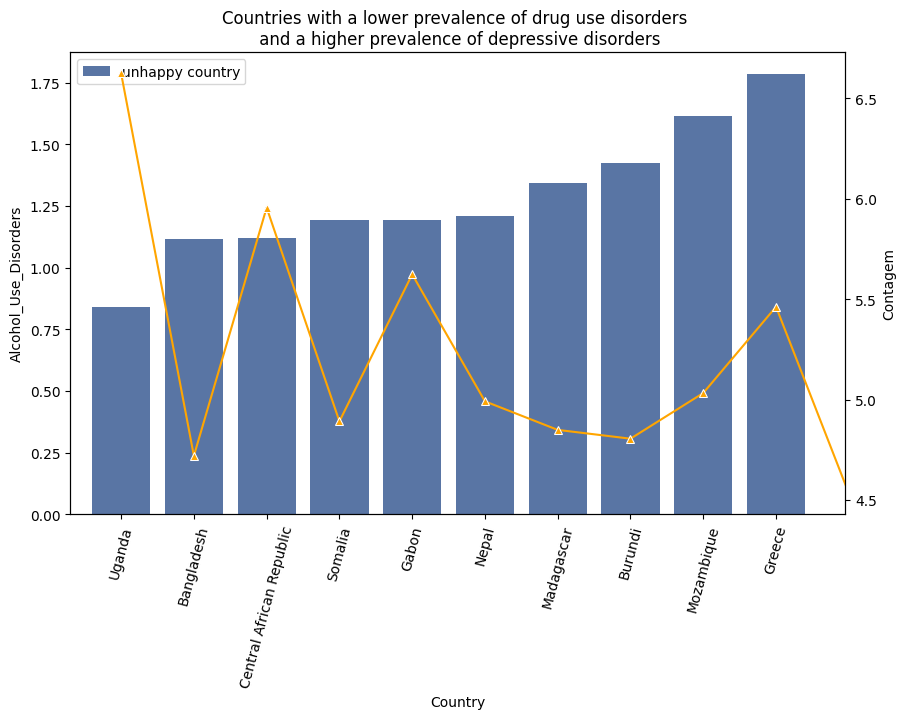

In [527]:
print('Proportion of alcoholic countries\n', df_conclusion['Continent'].value_counts(normalize=True))

# PLOTAGEM GRÁFICA
plt.figure(figsize=(10,6))

ax1 = sns.barplot(data=df_conclusion, x='Country', hue= 'Result_Happiness', y='Alcohol_Use_Disorders', palette='deep')
ax2 = ax1.twinx() #possibilita a sobreposição do outro gráfico
ax2 = sns.lineplot(x='Country', y='Depression_disorders_Both_Gender', data=depressed_countries, ax=ax2, color='orange', marker='^')

plt.title('Countries with a lower prevalence of drug use disorders \n and a higher prevalence of depressive disorders')
plt.xlabel('Device')
plt.ylabel('Contagem')
ax1.legend(title='')
ax1.set_xticks(ax1.get_xticks()) #declaração sugerida pelo warning do ipynb
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)
plt.xlim(-0.7, len(df_conclusion['Country']) - 0.05)

plt.show()

***Insights***

O gráfico confirma que ao buscar países com menores taxas de consumo de alcool também atingiremos países com elevadas taxas transtornos depressivos e que são países considerados infelizes no ranking geral. Atingimos Africa (70%) e Asia (20%), considerados continentes críticos inicialmente.

Países sugeridos para a campanha de distribuição de antidepressivos:\
'Uganda' 'Bangladesh' 'Central African Republic' 'Somalia' 'Gabon'
 'Nepal' 'Madagascar' 'Burundi' 'Mozambique' 'Greece'

# 4. Qual a relação do genêro com a mortalidade por suicidio e as taxas de transtornos depressivos?

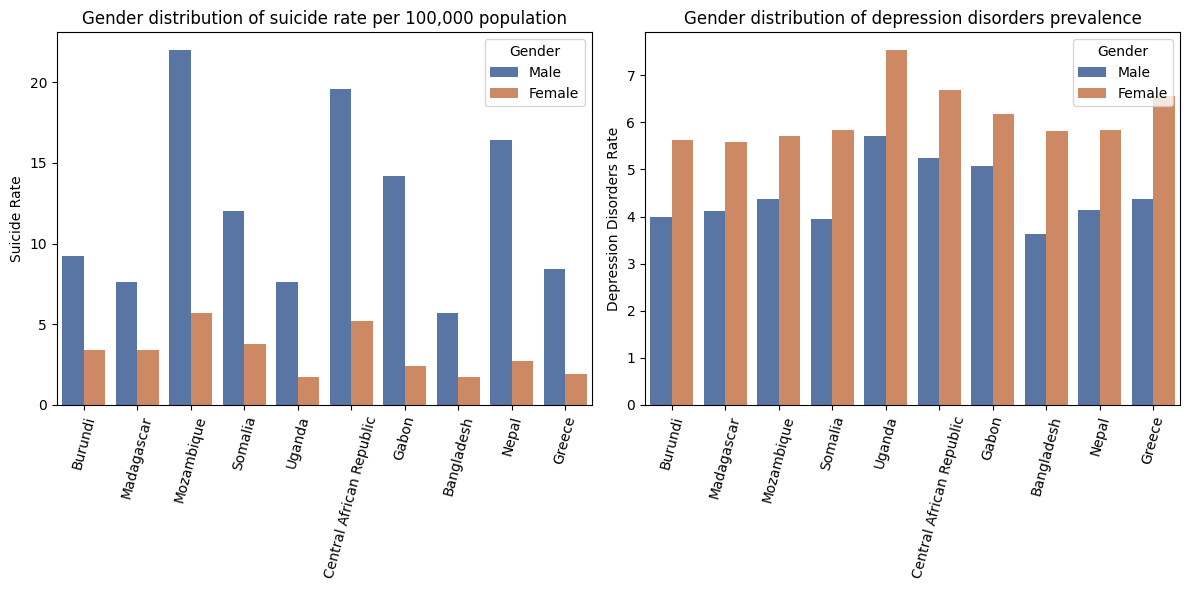

In [528]:
df_gender_analysis = df_mental_health[df_mental_health['Country'].str.contains('Uganda|Bangladesh|Central African Republic|Somalia|Gabon|Nepal|Madagascar|Burundi|Mozambique|Greece')].reset_index(drop='index') #apenas os países da conclusão final
# print(df_gender_analysis)

df_gender_suicide = pd.melt(df_gender_analysis, id_vars=['Country', 'Continent'], value_vars=['Rate_Suicide_Male', 'Rate_Suicide_Female'], var_name='Gender_Suicide_Rate', value_name='Suicide_Rate')
df_gender_suicide.replace({'Rate_Suicide_Male': 'Male', 'Rate_Suicide_Female': 'Female'}, inplace=True)
# print(df_gender_suicide)

df_gender_depression = pd.melt(df_gender_analysis, id_vars=['Country', 'Continent'], value_vars=['Depression_disorders_Male', 'Depression_disorders_Female'], var_name='Gender_Depression_Disorders', value_name='Depression_Disorders_Rate')
df_gender_depression.replace({'Depression_disorders_Male': 'Male', 'Depression_disorders_Female': 'Female'}, inplace=True)
# print(df_gender_depression)


#PLOTAGEM GRÁFICA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(data=df_gender_suicide, x='Country', y='Suicide_Rate', hue='Gender_Suicide_Rate', palette='deep', ax=ax1)
ax2 = sns.barplot(data=df_gender_depression, x='Country', y='Depression_Disorders_Rate', hue='Gender_Depression_Disorders', palette='deep', ax=ax2)

ax1.set_xticks(ax1.get_xticks()) #declaração sugerida pelo warning do ipynb
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)
ax2.set_xticks(ax2.get_xticks()) #declaração sugerida pelo warning do ipynb
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=75)

ax1.set_title('Gender distribution of suicide rate per 100,000 population')
ax2.set_title('Gender distribution of depression disorders prevalence')

ax1.set_xlabel('')
ax2.set_xlabel('')

ax1.set_ylabel('Suicide Rate')
ax2.set_ylabel('Depression Disorders Rate')

ax1.legend(title='Gender', loc='upper right')
ax2.legend(title='Gender', loc='upper right')

plt.tight_layout()
plt.show()

***Insights***

Levando em consideração que:

1. Alta discrepância entre os índices de suícidio por genero, uma dominância masculina nas taxas;\
2. Distribuição semelhante de ocorrência transtornos depressivos;\
3. A consequência fatal da doença não tratada de Transtorno depressivo ser o suicídio;\
4. Objetivo da distribuição de medicamente é atingir um público vulnerável considerando diversos fatores.

Recomenda-se que o público vulnerável de todos os países sugeridos seja o masculino.